<a href="https://colab.research.google.com/github/Suleymanabdy/Data-Science-Checkpoints./blob/main/Streamlit_checkpoint_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas pandas-profiling scikit-learn streamlit

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Financial_inclusion_dataset.csv")

In [ ]:
print(df.head())

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relativ

In [ ]:
#Displaying general information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [ ]:
!pip install pydantic-settings

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title= "Ydata_profiling Report",explorative=True)
profile.to_file("/content/Financial_inclusion_dataset.csv")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:379: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()# missing values


,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()

In [ ]:
categorical_columns = ['location_type', 'bank_account', 'job_type','country','uniqueid','cellphone_access','gender_of_respondent','relationship_with_head','marital_status','education_level']
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR


In [ ]:
outliers_lower = (df < lower_bound)
outliers_upper = ( df > upper_bound)

df_no_outliers = df[~(outliers_lower| outliers_upper).any(axis=1)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#calculating the correlation matrix
corr = df.corr()

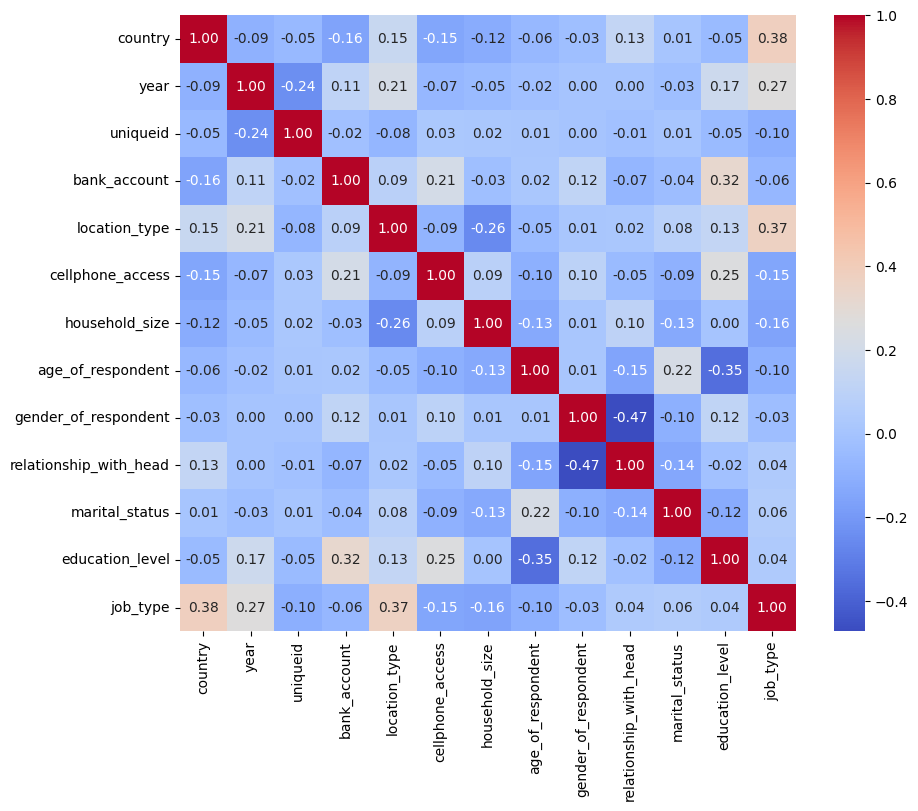

In [ ]:
#creating a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Spliting the data into features (X) and target variable (y)
X = df[['cellphone_access', 'location_type','job_type','age_of_respondent']]
y = df['bank_account']

In [ ]:
#spliting the data into traning  and testing set ( 60% train ,40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#using a Decision Tree classifier
classifier = DecisionTreeClassifier()


In [ ]:
#Training the Classifier
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#making the prediction on the testing data
y_pred = classifier.predict(X_test)


In [ ]:
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.8722635494155154


In [ ]:
import pickle

In [ ]:

with open('classifier.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py

import pickle
import streamlit as st
import numpy as np

# Title of the application
st.title('Client Probability bank_account')

# Load the trained machine learning model
def load_model():
    with open('classifer.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    return model
model = load_model()

# Define features variable outside of the prediction button scope
features = []

# Input fields for features
feature1 = st.text_input('cellphone_access', 1, 10000)
feature2 = st.slider('location_type', 0, 100,)



Overwriting app.py


In [ ]:
X_train

,cellphone_access,location_type,job_type,age_of_respondent
12033,1,1,5,18
11888,1,0,5,49
20909,1,1,5,41
22785,0,0,7,25
14323,1,0,5,46
...,...,...,...,...
11964,1,0,1,27
21575,1,0,9,40
5390,1,0,2,35
860,1,1,9,42


In [ ]:
features =['1','0',49]


In [ ]:
!npm install localtunnel


⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 1s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl -s ipv4.icanhazip.com

35.185.209.92
⠙

⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://35.185.209.92:8501

your url is: https://blue-crews-relate.loca.lt
  Stopping...
